In [ ]:
'''

This project addresses the critical need for analyzing user activity data to uncover trends, make accurate predictions about future engagement, 
and provide actionable insights for stakeholders. By leveraging data driven strategies, this analysis aims to empower decision makers in 
improving player retention, optimizing server capacities, and tailoring marketing initiatives such as when to drop more content to keep players 
engaged. Without a clear understanding of player patterns, gaming companies risk inefficient resource allocation and missed opportunities to 
enhance user experiences. The focus is on identifying key trends, understanding the drivers of player activity, and building predictive models 
to forecast future player engagement. 

'''

In [5]:
# Milestone 1

import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

url = 'https://steamcharts.com/app/230410' 
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table with class 'common-table'
table = soup.find('table', {'class': 'common-table'})

# Extract the table rows
data = []
if table:
    rows = table.find_all('tr')  # Find all rows in the table
    for row in rows[1:]:  # Skip the header row
        columns = row.find_all('td')  # Find all columns in each row
        if columns:
            # Extract and append the text from each column
            rowData = [col.text.strip() for col in columns]
            data.append(rowData)
else:
    print("Table not found")

# Convert the data to a DataFrame
if data:
    df = pd.DataFrame(data, columns=['Month', 'Avg. Players', 'Gain', '% Gain', 'Peak Players'])
    print(df)
else:
    print("No data to display")


              Month Avg. Players      Gain         % Gain Peak Players
0      Last 30 Days     53742.03  +12268.4        +29.58%        98228
1    September 2024     41473.62  -4295.39         -9.38%        60537
2       August 2024     45769.01   1944.28         +4.44%        68005
3         July 2024     43824.73    120.71         +0.28%        97330
4         June 2024     43704.02    684.09         +1.59%        91584
..              ...          ...       ...            ...          ...
137        May 2013     10338.53  -1991.12        -16.15%        19734
138      April 2013     12329.65  10369.52       +529.02%        21157
139      March 2013      1960.13   1960.13  +43776179.05%        19099
140   February 2013         0.00      0.00          +Inf%            1
141    January 2013         0.00         -              -            0

[142 rows x 5 columns]


In [7]:
# Milestone 1

# Function to clean up and convert the Gain and % Gain columns to numeric while preserving the signs
def convertToSignedNumeric(col):
    # Strip percentage symbols and convert to numeric, preserving signs
    col = col.str.replace('%', '')  # Remove the percentage symbol
    col = col.str.replace('Inf', '0')  # Replace 'Inf' with 0
    col = pd.to_numeric(col, errors='coerce')  # Convert to numeric
    return col

#Step 1: Convert 'Gain' to numeric
df['Gain'] = convertToSignedNumeric(df['Gain'])

# Convert '% Gain' to numeric
df['% Gain'] = convertToSignedNumeric(df['% Gain'])

# Peak Players '% Gain' to numeric
df['Peak Players'] = pd.to_numeric(df['Peak Players'], errors='coerce').fillna(0)

df['Avg. Players'] = pd.to_numeric(df['Avg. Players'], errors='coerce').fillna(0).round(0).astype(int)

# Handle "Last 30 Days" by replacing it with the current month and year
df['Month'] = df['Month'].apply(lambda x: datetime.now().strftime('%B %Y') if x == 'Last 30 Days' else x)

# Convert 'Month' to a datetime
df['Month'] = pd.to_datetime(df['Month'], errors='coerce', format='%B %Y')


print(df)
print(df.dtypes)


         Month  Avg. Players      Gain       % Gain  Peak Players
0   2024-10-01         53742  12268.40        29.58         98228
1   2024-09-01         41474  -4295.39        -9.38         60537
2   2024-08-01         45769   1944.28         4.44         68005
3   2024-07-01         43825    120.71         0.28         97330
4   2024-06-01         43704    684.09         1.59         91584
..         ...           ...       ...          ...           ...
137 2013-05-01         10339  -1991.12       -16.15         19734
138 2013-04-01         12330  10369.52       529.02         21157
139 2013-03-01          1960   1960.13  43776179.05         19099
140 2013-02-01             0      0.00         0.00             1
141 2013-01-01             0       NaN          NaN             0

[142 rows x 5 columns]
Month           datetime64[ns]
Avg. Players             int32
Gain                   float64
% Gain                 float64
Peak Players             int64
dtype: object


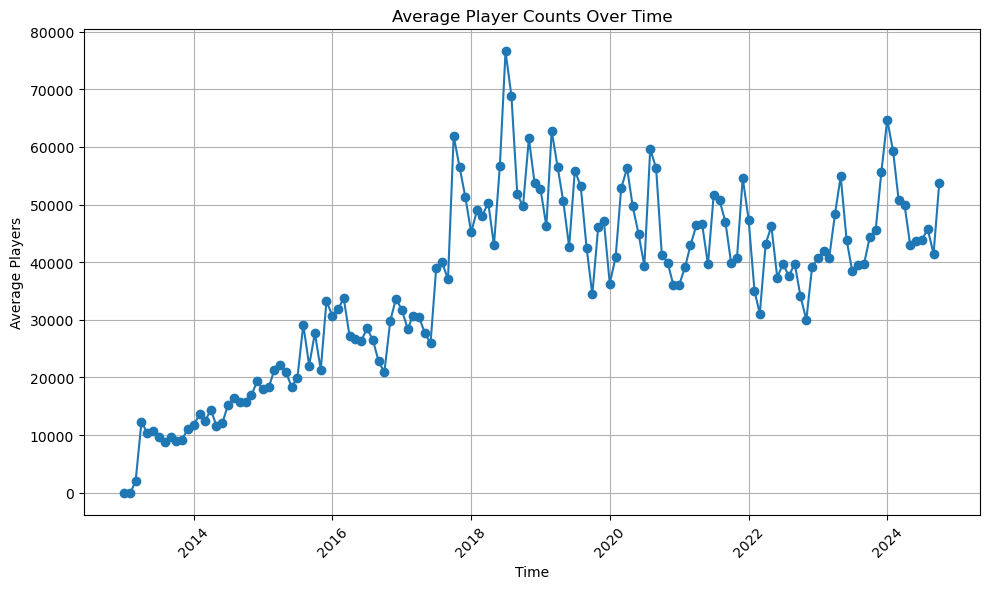

In [9]:
# Milestone 1

import pandas as pd
import matplotlib.pyplot as plt

# Time Series Line Graph: Shows the raw player counts over time
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Avg. Players'], marker='o')
plt.title('Average Player Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Average Players')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

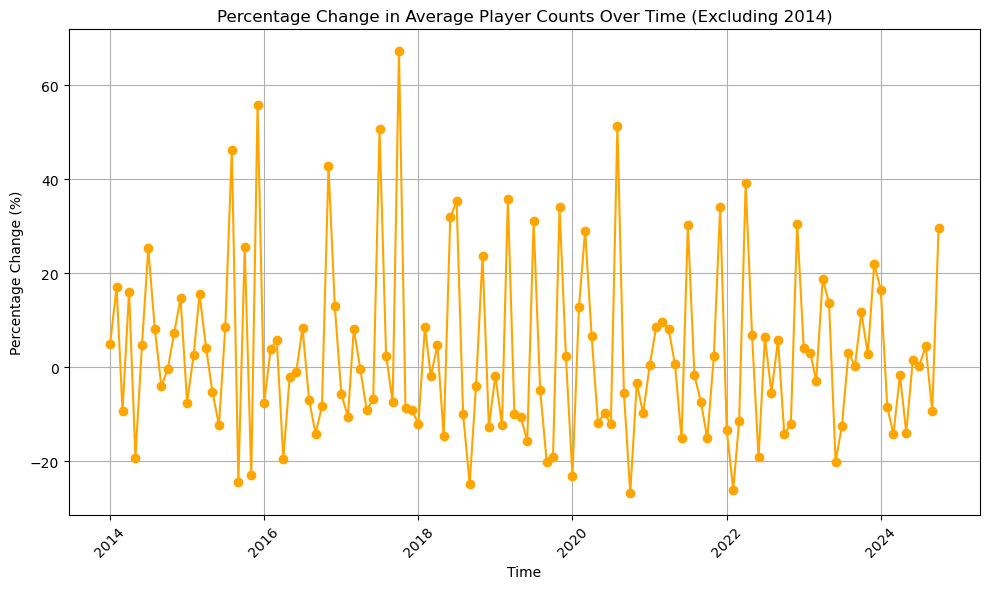

In [11]:
# Milestone 1

# Percentage Change in Player Counts

# Filter out rows where the 'Month' is from the year 2014
df_filtered = df[df['Month'].dt.year != 2013]

# plot the Percentage Change in Player Counts
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Month'], df_filtered['% Gain'], marker='o', color='orange')
plt.title('Percentage Change in Average Player Counts Over Time (Excluding 2014)')
plt.xlabel('Time')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

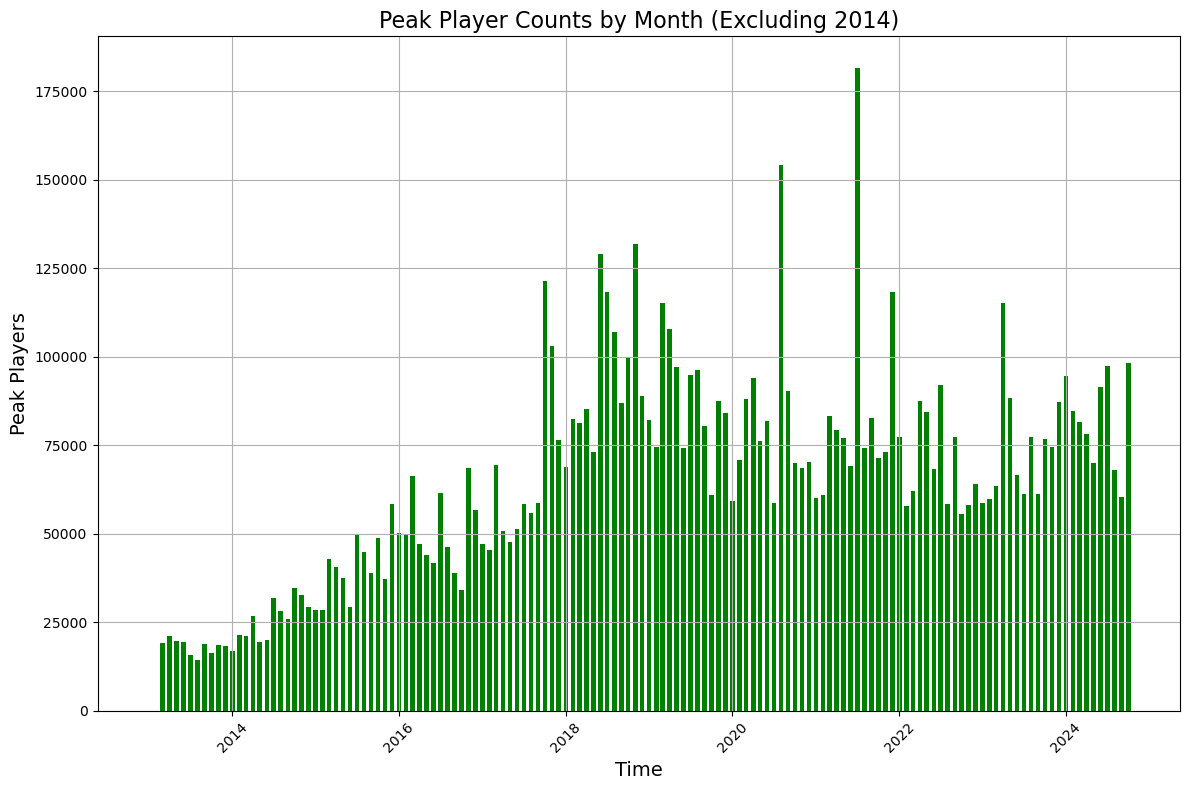

In [13]:
# Milestone 1

import matplotlib.pyplot as plt

# Filter out rows with missing 'Peak Players' values
df_filtered = df[df['Peak Players'].notna()]

# Plot the Peak Player Count by Month 
plt.figure(figsize=(12, 8)) 
plt.bar(df_filtered['Month'], df_filtered['Peak Players'], color='green', width=20)  
plt.title('Peak Player Counts by Month (Excluding 2014)', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Peak Players', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


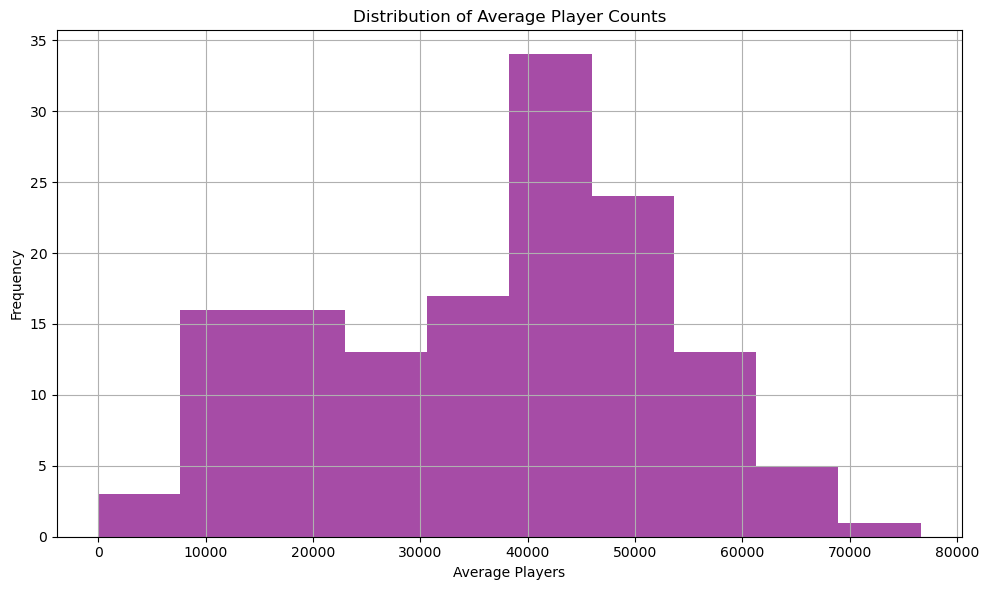

In [14]:
# Milestone 1

# Histogram of Player Count Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Avg. Players'], bins=10, color='purple', alpha=0.7)
plt.title('Distribution of Average Player Counts')
plt.xlabel('Average Players')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
# Milestone 2

import pandas as pd

# Load the data
df = pd.read_csv(r'C:\Users\jayle\Downloads\steamChartsData.csv')

# Drop the unneeded columns
dataCleaned = df.drop(columns=['Unnamed: 0'])

# Convert 'Month' to datetime format
dataCleaned['month'] = pd.to_datetime(dataCleaned['Month'], format='%Y-%m-%d')

# Check for rows with missing data
missingDataRows = dataCleaned[dataCleaned.isnull().any(axis=1)]

# Fill missing values
dataCleaned['Gain'].fillna(0, inplace=True)
dataCleaned['% Gain'].fillna(0, inplace=True)

# Extract year and month as separate features
dataCleaned['year'] = dataCleaned['month'].dt.year
dataCleaned['monthNum'] = dataCleaned['month'].dt.month

# Rename month to date
dataCleaned['date'] = dataCleaned['month']
dataCleaned = dataCleaned.drop(['Month'], axis=1)

# Create rolling averages for 'Avg. Players' and 'Peak Players'
dataCleaned['rollingAvg3Months'] = dataCleaned['Avg. Players'].rolling(window=3).mean()
dataCleaned['rollingAvg6Months'] = dataCleaned['Avg. Players'].rolling(window=6).mean()

dataCleaned['rollingPeak3Months'] = dataCleaned['Peak Players'].rolling(window=3).mean()
dataCleaned['rollingPeak6Months'] = dataCleaned['Peak Players'].rolling(window=6).mean()

# Create lag features for 'Avg. Players' and 'Peak Players'
dataCleaned['lag1MonthAvgPlayers'] = dataCleaned['Avg. Players'].shift(1)
dataCleaned['lag3MonthAvgPlayers'] = dataCleaned['Avg. Players'].shift(3)
dataCleaned['lag6MonthAvgPlayers'] = dataCleaned['Avg. Players'].shift(6)

dataCleaned['lag1MonthPeakPlayers'] = dataCleaned['Peak Players'].shift(1)
dataCleaned['lag3MonthPeakPlayers'] = dataCleaned['Peak Players'].shift(3)
dataCleaned['lag6MonthPeakPlayers'] = dataCleaned['Peak Players'].shift(6)

print(dataCleaned)



     Avg. Players      Gain       % Gain  Peak Players      month  year  \
0           51413   9939.80        23.97         98228 2024-10-01  2024   
1           41474  -4295.39        -9.38         60537 2024-09-01  2024   
2           45769   1944.28         4.44         68005 2024-08-01  2024   
3           43825    120.71         0.28         97330 2024-07-01  2024   
4           43704    684.09         1.59         91584 2024-06-01  2024   
..            ...       ...          ...           ...        ...   ...   
137         10339  -1991.12       -16.15         19734 2013-05-01  2013   
138         12330  10369.52       529.02         21157 2013-04-01  2013   
139          1960   1960.13  43776179.05         19099 2013-03-01  2013   
140             0      0.00         0.00             1 2013-02-01  2013   
141             0      0.00         0.00             0 2013-01-01  2013   

     monthNum       date  rollingAvg3Months  rollingAvg6Months  \
0          10 2024-10-01         

C:\Users\jayle\AppData\Local\Temp\ipykernel_16308\2978478408.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataCleaned['Gain'].fillna(0, inplace=True)
C:\Users\jayle\AppData\Local\Temp\ipykernel_16308\2978478408.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

ARIMA Model Results:
ARIMA MAE: 9772.540612707673
ARIMA RMSE: 11310.605310743766
ARIMA Relative MAE (%): 26.87914747233087
ARIMA Relative RMSE (%): 31.1095589363405


C:\Users\jayle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
C:\Users\jayle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jayle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
C:\Users\jayle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jayle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was

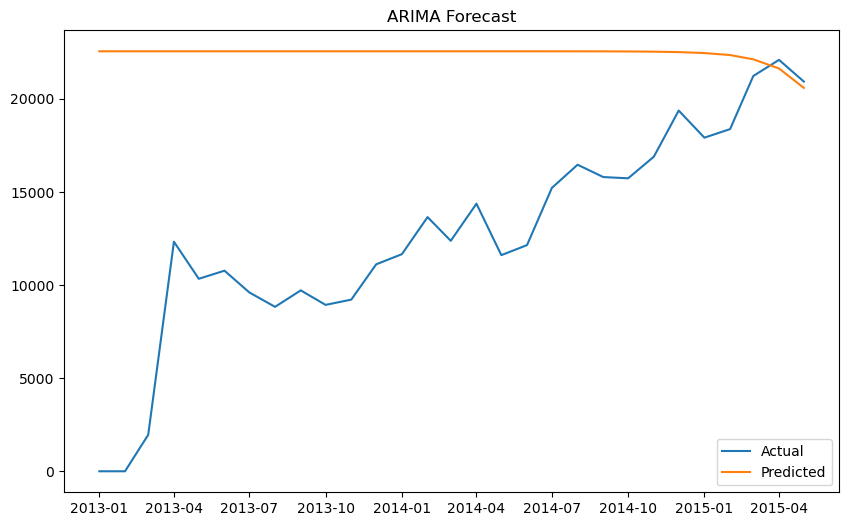

SARIMA Model Results:


C:\Users\jayle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
C:\Users\jayle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jayle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
C:\Users\jayle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jayle\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting a

SARIMA MAE: 6585.924183672761
SARIMA RMSE: 7798.376052416936
SARIMA Relative MAE (%): 18.1144325094273
SARIMA Relative RMSE (%): 21.4492533993707


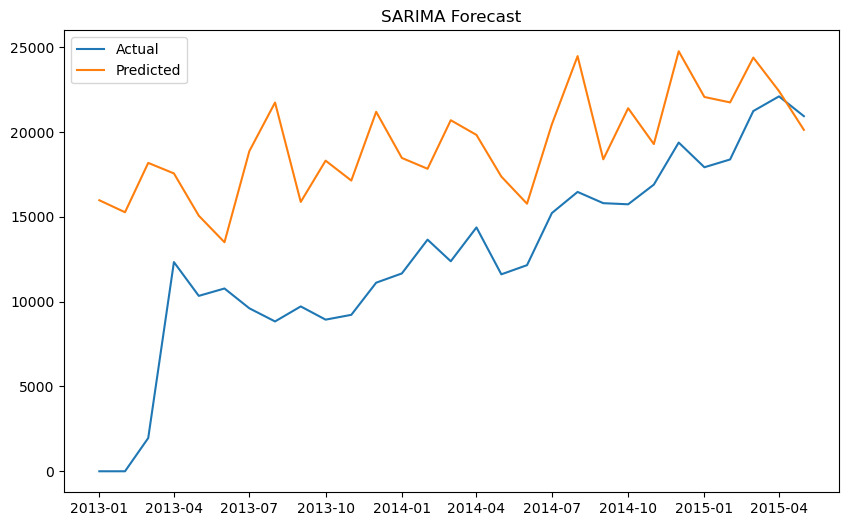

LSTM Model Results:


C:\Users\jayle\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
LSTM MAE: 1749.3239088792068
LSTM RMSE: 2425.1986133392375
LSTM Relative MAE (%): 4.811475049026233
LSTM Relative RMSE (%): 6.670452829110965


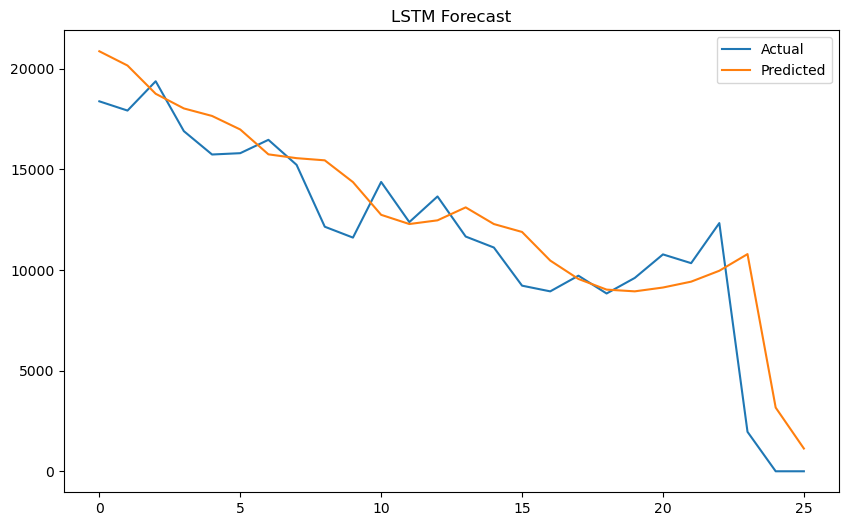

In [47]:
# Milestone 3

# Import required libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load and preprocess data
data = dataCleaned
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Select the target column
target = 'Avg. Players'
train_size = int(len(data) * 0.8)
train, test = data[target].iloc[:train_size], data[target].iloc[train_size:]

# Helper function to calculate MAPE with zero handling
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

# Define typical player count for calculating relative errors
typical_avg_players = data[target].mean() 

# ARIMA Model Training and Evaluation with Relative Error Calculations
def train_arima(train, test):
    model = ARIMA(train, order=(1,1,1)) 
    arima_model = model.fit()
    predictions = arima_model.forecast(steps=len(test))

    mae = mean_absolute_error(test, predictions)
    rmse = sqrt(mean_squared_error(test, predictions))
    
    relative_mae = (mae / typical_avg_players) * 100
    relative_rmse = (rmse / typical_avg_players) * 100
    
    print("ARIMA MAE:", mae)
    print("ARIMA RMSE:", rmse)
    print("ARIMA Relative MAE (%):", relative_mae)
    print("ARIMA Relative RMSE (%):", relative_rmse)
    
    plt.figure(figsize=(10,6))
    plt.plot(test.index, test, label='Actual')
    plt.plot(test.index, predictions, label='Predicted')
    plt.title('ARIMA Forecast')
    plt.legend()
    plt.show()
    
    return predictions

# SARIMA Model Training and Evaluation with Relative Error Calculations
def train_sarima(train, test):
    model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
    sarima_model = model.fit(disp=False)
    predictions = sarima_model.forecast(steps=len(test))

    mae = mean_absolute_error(test, predictions)
    rmse = sqrt(mean_squared_error(test, predictions))

    relative_mae = (mae / typical_avg_players) * 100
    relative_rmse = (rmse / typical_avg_players) * 100
    
    print("SARIMA MAE:", mae)
    print("SARIMA RMSE:", rmse)
    print("SARIMA Relative MAE (%):", relative_mae)
    print("SARIMA Relative RMSE (%):", relative_rmse)
    
    plt.figure(figsize=(10,6))
    plt.plot(test.index, test, label='Actual')
    plt.plot(test.index, predictions, label='Predicted')
    plt.title('SARIMA Forecast')
    plt.legend()
    plt.show()
    
    return predictions

# LSTM Model Training and Evaluation with Relative Error Calculations
def prepare_lstm_data(series, look_back=3):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:(i + look_back)])
        y.append(series[i + look_back])
    return np.array(X), np.array(y)

look_back = 3
X_train, y_train = prepare_lstm_data(train.values, look_back)
X_test, y_test = prepare_lstm_data(test.values, look_back)

# Reshape data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
def train_lstm(X_train, y_train, X_test, y_test):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mae')
    
    # Fit the model
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    
    # Make predictions
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    rmse = sqrt(mean_squared_error(y_test, predictions))

    relative_mae = (mae / typical_avg_players) * 100
    relative_rmse = (rmse / typical_avg_players) * 100
    
    print("LSTM MAE:", mae)
    print("LSTM RMSE:", rmse)
    print("LSTM Relative MAE (%):", relative_mae)
    print("LSTM Relative RMSE (%):", relative_rmse)
    
    plt.figure(figsize=(10,6))
    plt.plot(range(len(y_test)), y_test, label='Actual')
    plt.plot(range(len(predictions)), predictions, label='Predicted')
    plt.title('LSTM Forecast')
    plt.legend()
    plt.show()
    
    return predictions

# Execute the models
print("ARIMA Model Results:")
arima_predictions = train_arima(train, test)

print("SARIMA Model Results:")
sarima_predictions = train_sarima(train, test)

print("LSTM Model Results:")
lstm_predictions = train_lstm(X_train, y_train, X_test, y_test)


In [ ]:
'''
Model Selection Justification:
ARIMA: 
ARIMA models are a solid choice for one-variable time series forecasting, especially when the data shows trends but doesn’t have strong 
seasonal patterns. ARIMA models are good at focusing on short-term dependencies and capturing general trends, like changes in player 
counts over time. It works best when the data shows a stable, predictable trend, and it doesn’t need a complex setup to give useful results.

SARIMA: 
SARIMA is an extension of ARIMA that includes seasonality, making it ideal for data with repeating patterns, like monthly or yearly cycles. 
In this case, if player engagement rises or falls during specific times of the year, SARIMA can capture these patterns better than regular ARIMA. 
It’s like ARIMA, but it’s built to recognize and predict those seasonal changes.

LSTM: LSTM is a type of recurrent neural network (RNN) that’s designed for working with sequences and time series data, 
especially when there are long-term dependencies. This model can capture both short-term and long-term patterns and is flexible enough to 
handle complex relationships and irregular fluctuations, which are common in player engagement data. LSTMs are particularly good for spotting 
patterns that aren’t straightforward and might change over time.

Evaluation Metric Justification:
Mean Absolute Error (MAE): 
MAE measures the average error between predictions and actual values, expressed in the same units as the data (player count). 
It’s simple and easy to understand because it directly shows the average size of the errors. MAE helps us see if predictions are 
generally close to actual values. Plus, it’s less affected by outliers, making it a balanced measure of typical errors.

Root Mean Squared Error (RMSE): 
RMSE is similar to MAE but puts extra weight on larger errors, which means it penalizes predictions that are further from actual values. 
This is helpful in a context like player engagement, where big prediction mistakes can be a bigger problem. RMSE complements MAE by giving 
insight into how well the model avoids large errors.

Relative Errors (Relative MAE and Relative RMSE): 
These are calculated as a percentage of the average player count, helping to see how significant the errors are relative to the typical player count. 
This makes it easier to interpret error size based on the scale of the dataset. If relative errors are low, it means predictions are fairly 
accurate compared to the usual player counts, providing a practical sense of how good the model is.

Overview and Conclusion
After testing three different models to predict player engagement over time, I found that each model performed differently, 
with LSTM giving the most accurate results.LSTM was the best model for this dataset. It had the lowest errors, 
with a Mean Absolute Error (MAE) of 1,749 and a Root Mean Squared Error (RMSE) of 2,425. This means, on average, 
the LSTM predictions were off by about 4.8% compared to the typical monthly player counts, which is fairly accurate. 
LSTM’s strength is in recognizing both short-term and long-term patterns, which helped it make closer predictions.
SARIMA came in second, with a MAE of 6,586 and RMSE of 7,798. Its relative errors were higher than LSTM’s, at around 18% for MAE. 
SARIMA did better than ARIMA because it can recognize seasonal patterns, like changes in player counts that might repeat each month or year, 
but it still didn’t capture patterns as well as LSTM. ARIMA had the largest errors, with a MAE of 9,772 and RMSE of 11,311. 
Its relative errors were over 26% for MAE, showing that it wasn’t as accurate as the other two models. ARIMA is good for simple trends, 
but it didn’t handle the complexity and possible seasonality of the data as well as SARIMA and LSTM.
'''